In [2]:
import pandas as pd



In [9]:
train_path = 'Data/lucas0_text/lucas0_train.data'
test_path = 'Data/lucas0_text/lucas0_test.data'
targets_path = 'Data/lucas0_text/lucas0_train.targets'
param_path = 'Data/lucas0_text/lucas0.param'


column_names_targets = ['Lung_Cancer']  
column_names = [
    'Smoking',
    'Yellow_Fingers',
    'Anxiety',
    'Peer_Pressure',
    'Genetics',
    'Attention_Disorder',
    'Born_an_Even_Day',
    'Car_Accident',
    'Fatigue',
    'Allergy',
    'Coughing'
]


train = pd.read_csv(train_path, names= column_names,delimiter='\s+')
test = pd.read_csv(test_path)
targets = pd.read_csv(targets_path, names=column_names_targets)
param = pd.read_csv(param_path)


In [10]:
train

,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Genetics,Attention_Disorder,Born_an_Even_Day,Car_Accident,Fatigue,Allergy,Coughing
0,0,0,1,0,0,1,0,1,0,1,0
1,0,1,0,0,0,0,1,0,1,0,1
2,1,1,1,0,1,1,1,1,1,1,1
3,0,0,0,1,0,0,1,0,0,0,0
4,1,1,1,0,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,0,0,1,1,0,1
1996,1,1,1,0,0,0,0,0,1,0,1
1997,1,1,0,1,0,0,1,0,1,0,0
1998,1,1,1,0,1,1,0,1,1,0,1


In [11]:
targets

,Lung_Cancer
0,-1
1,1
2,1
3,-1
4,1
...,...
1995,1
1996,1
1997,1
1998,1


   Smoking  Yellow_Fingers  Anxiety  Peer_Pressure  Genetics  \
0        0               0        1              0         0   
1        0               1        0              0         0   
2        1               1        1              0         1   
3        0               0        0              1         0   
4        1               1        1              0         0   

   Attention_Disorder  Born_an_Even_Day  Car_Accident  Fatigue  Allergy  \
0                   1                 0             1        0        1   
1                   0                 1             0        1        0   
2                   1                 1             1        1        1   
3                   0                 1             0        0        0   
4                   1                 1             1        1        0   

   Coughing  Lung_Cancer  
0         0           -1  
1         1            1  
2         1            1  
3         0           -1  
4         0            1  
<c

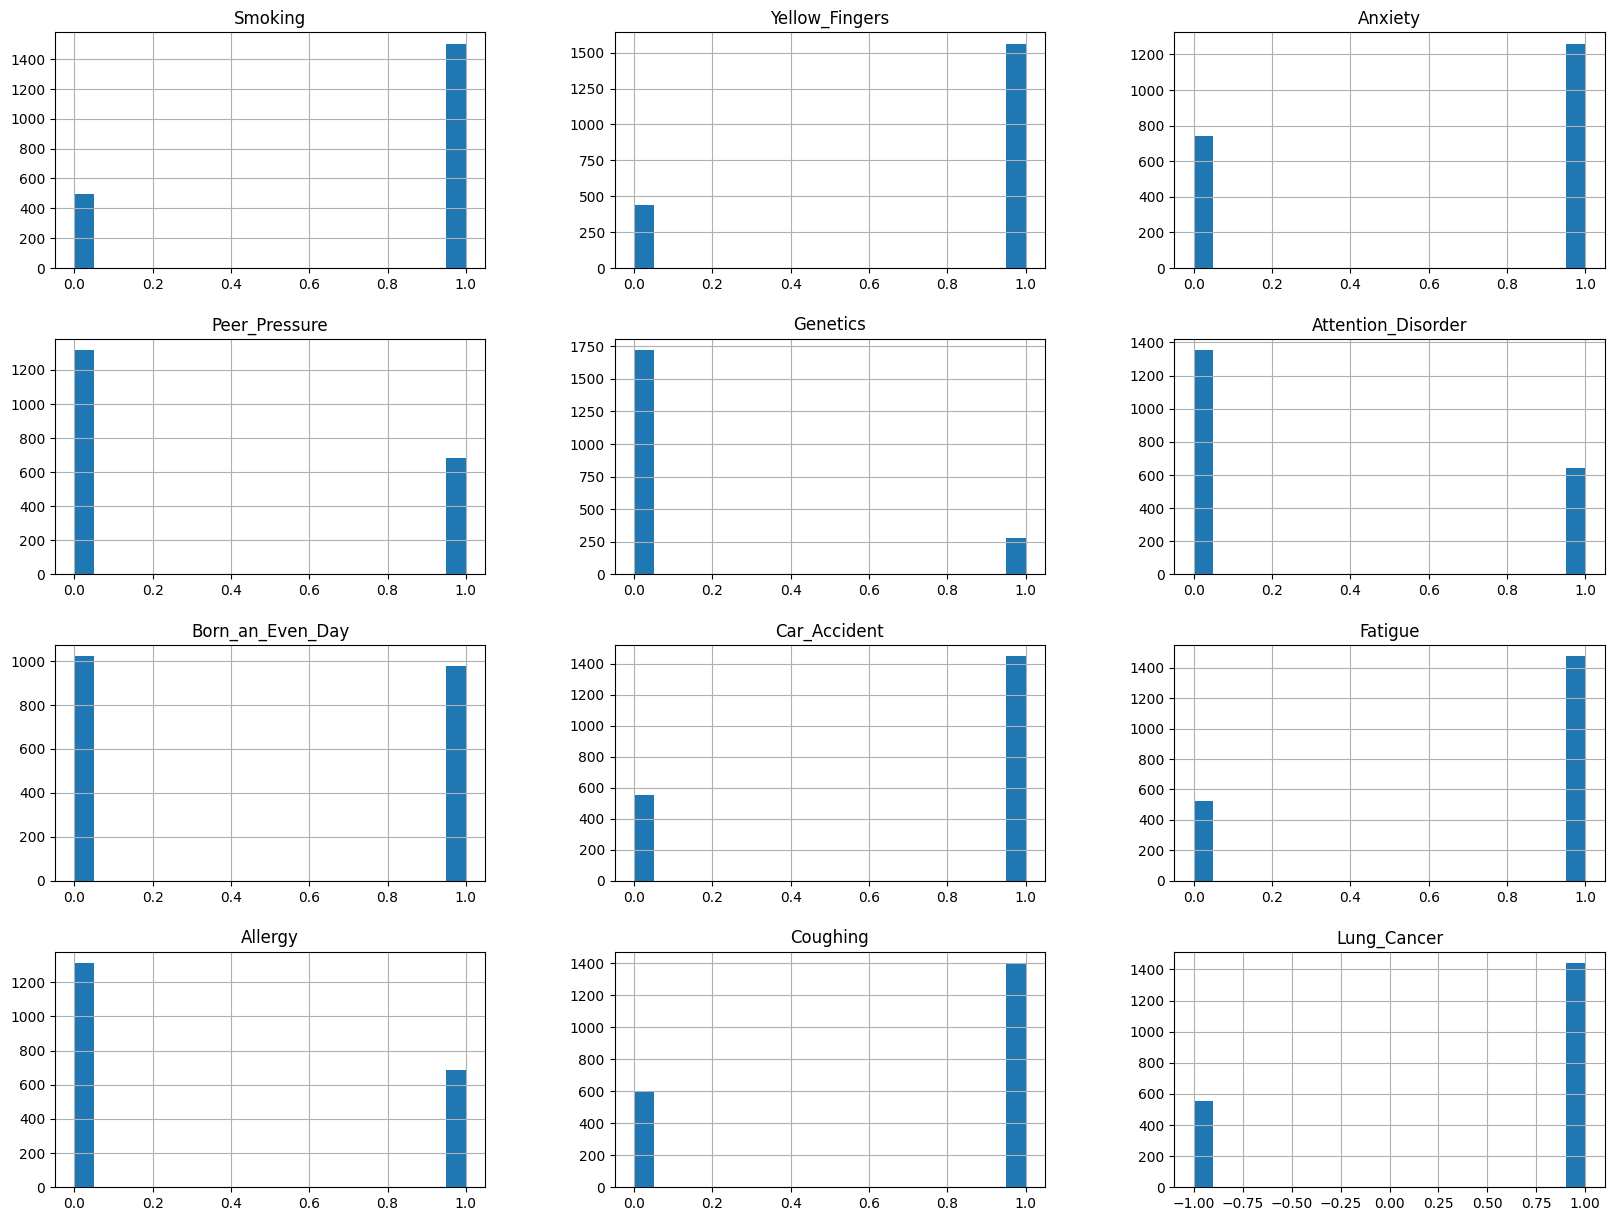

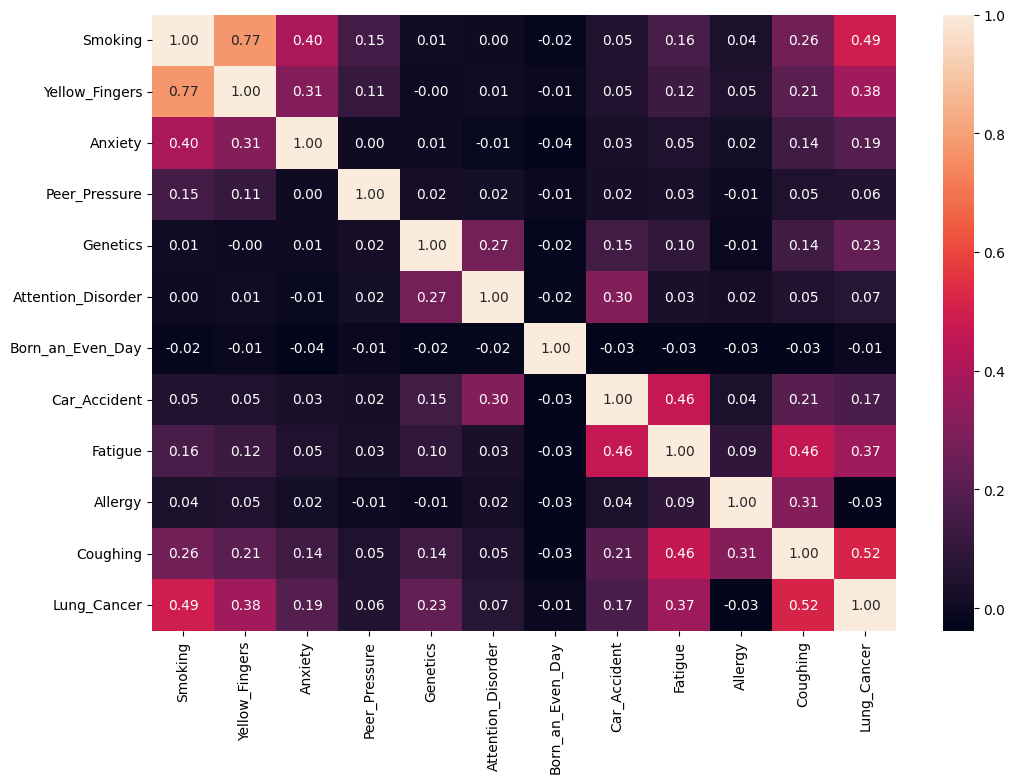

C:\Users\bjorn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


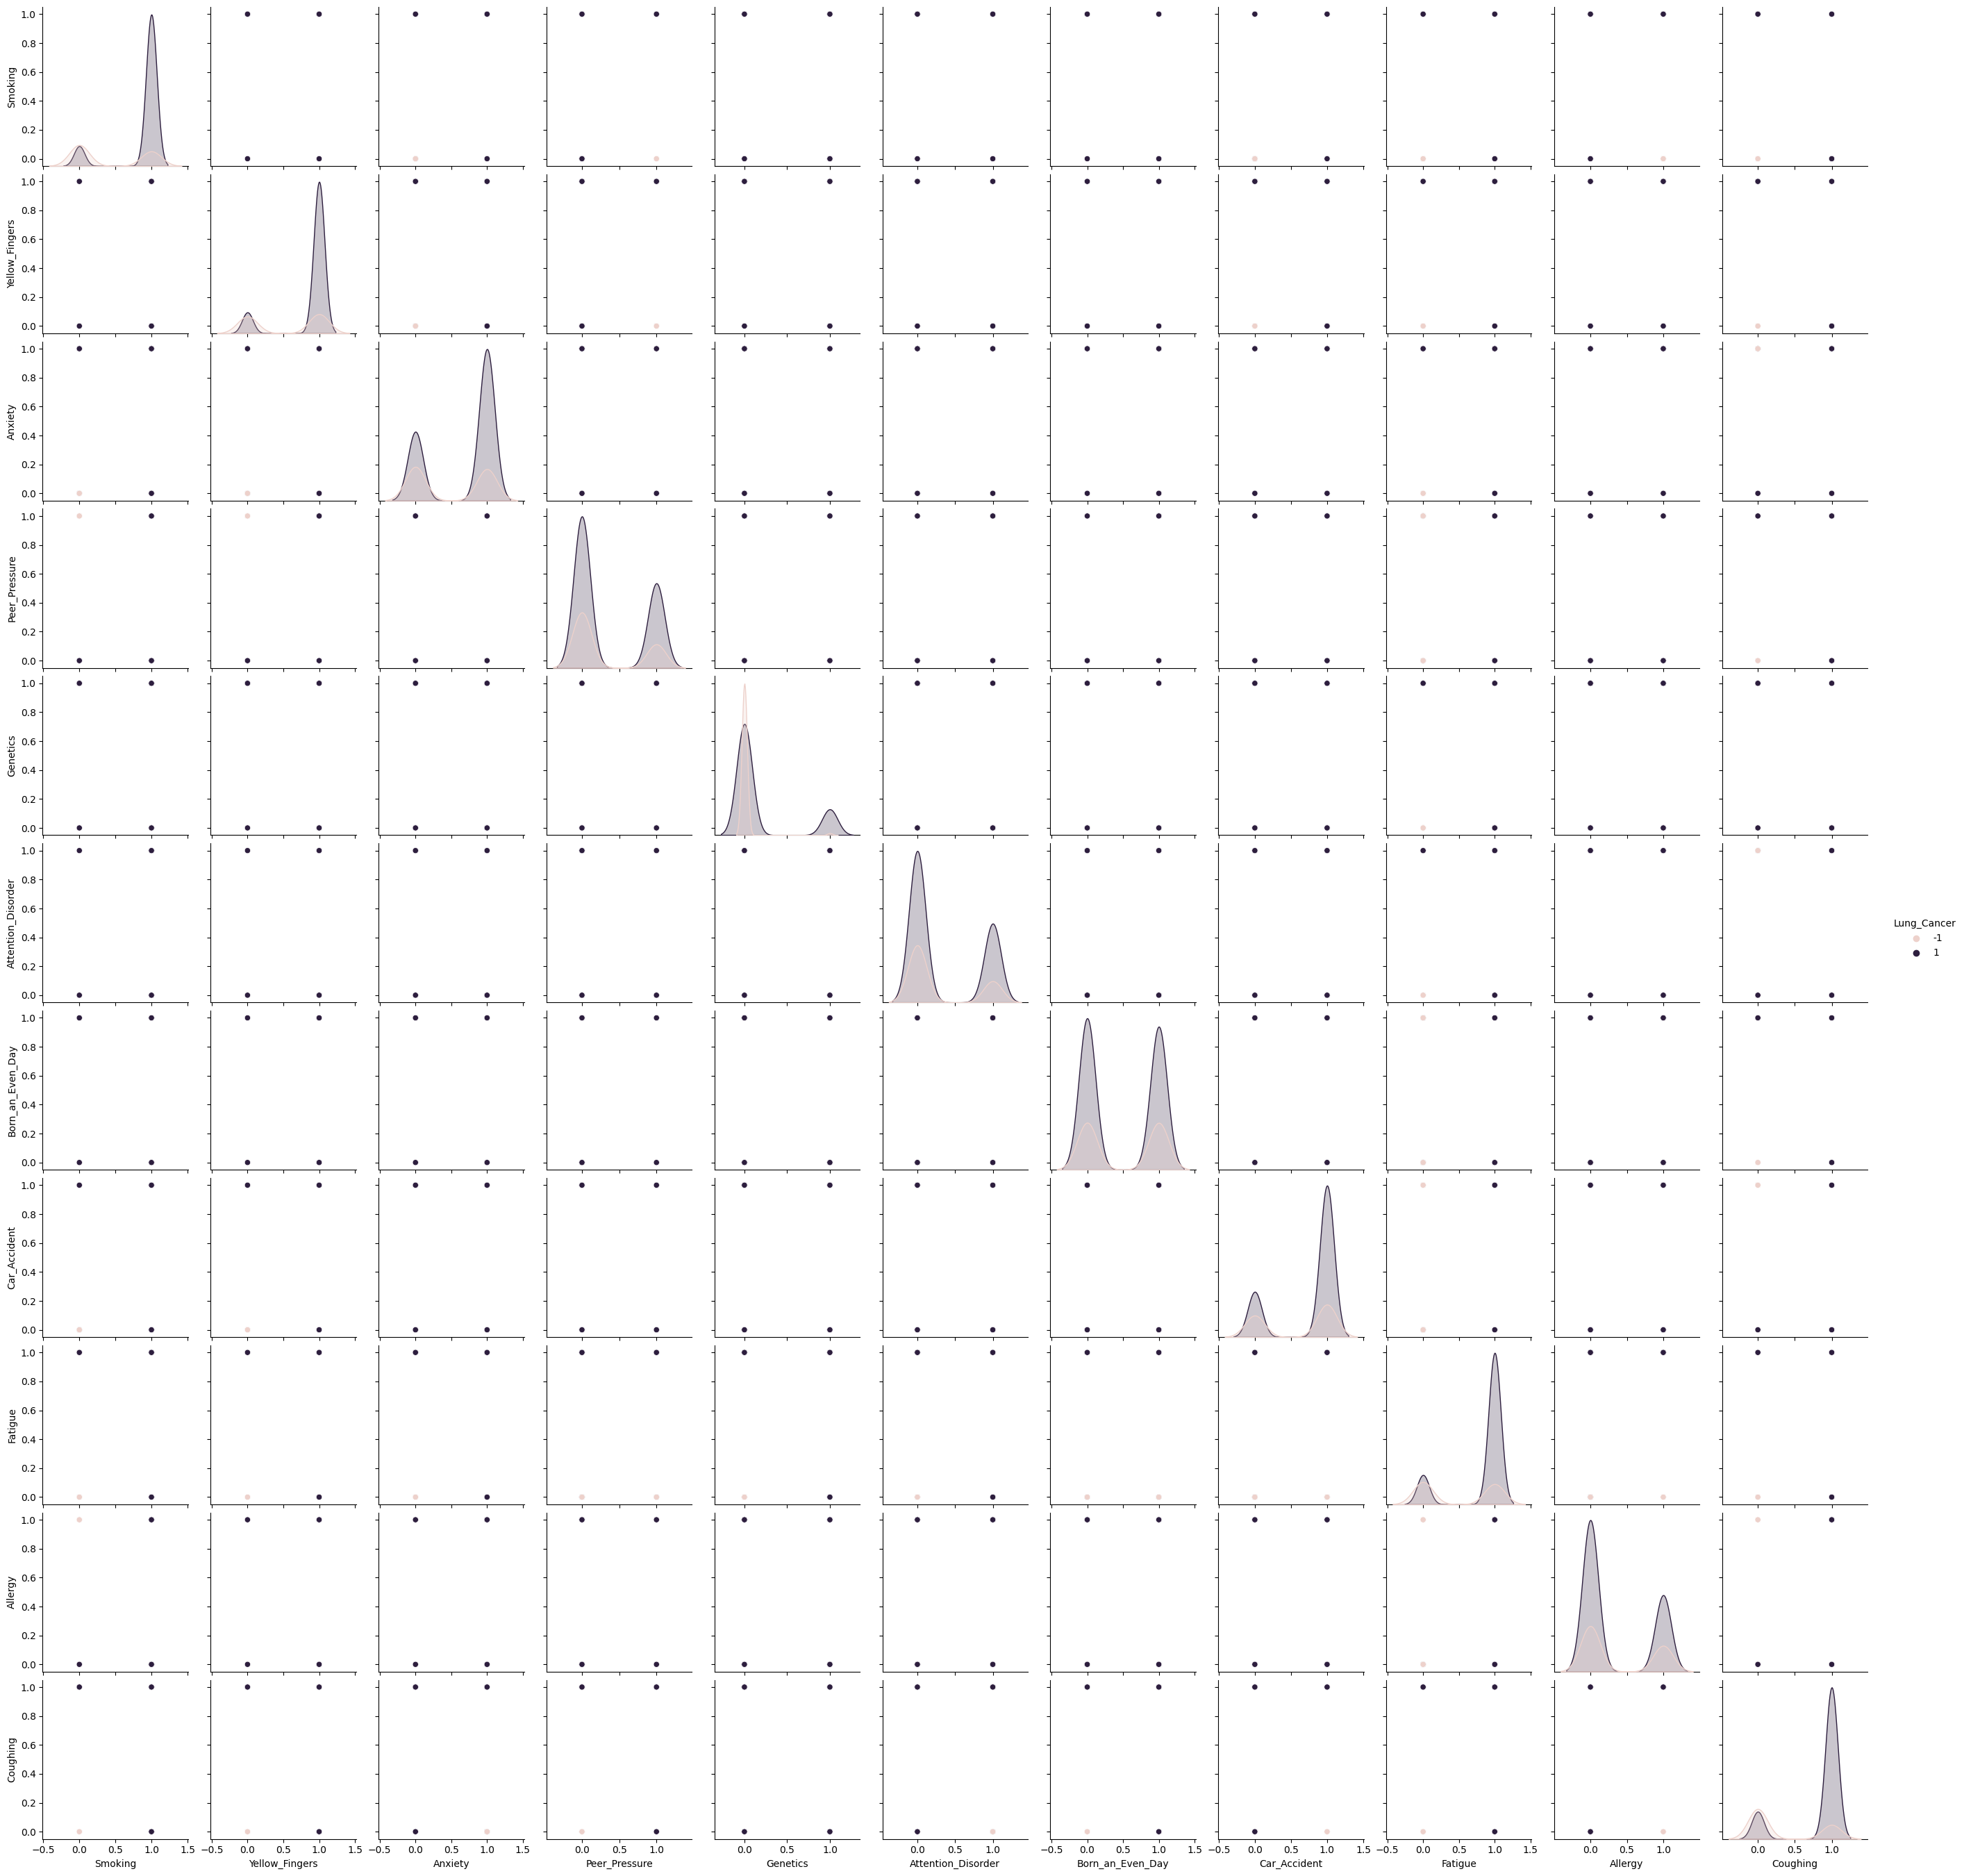

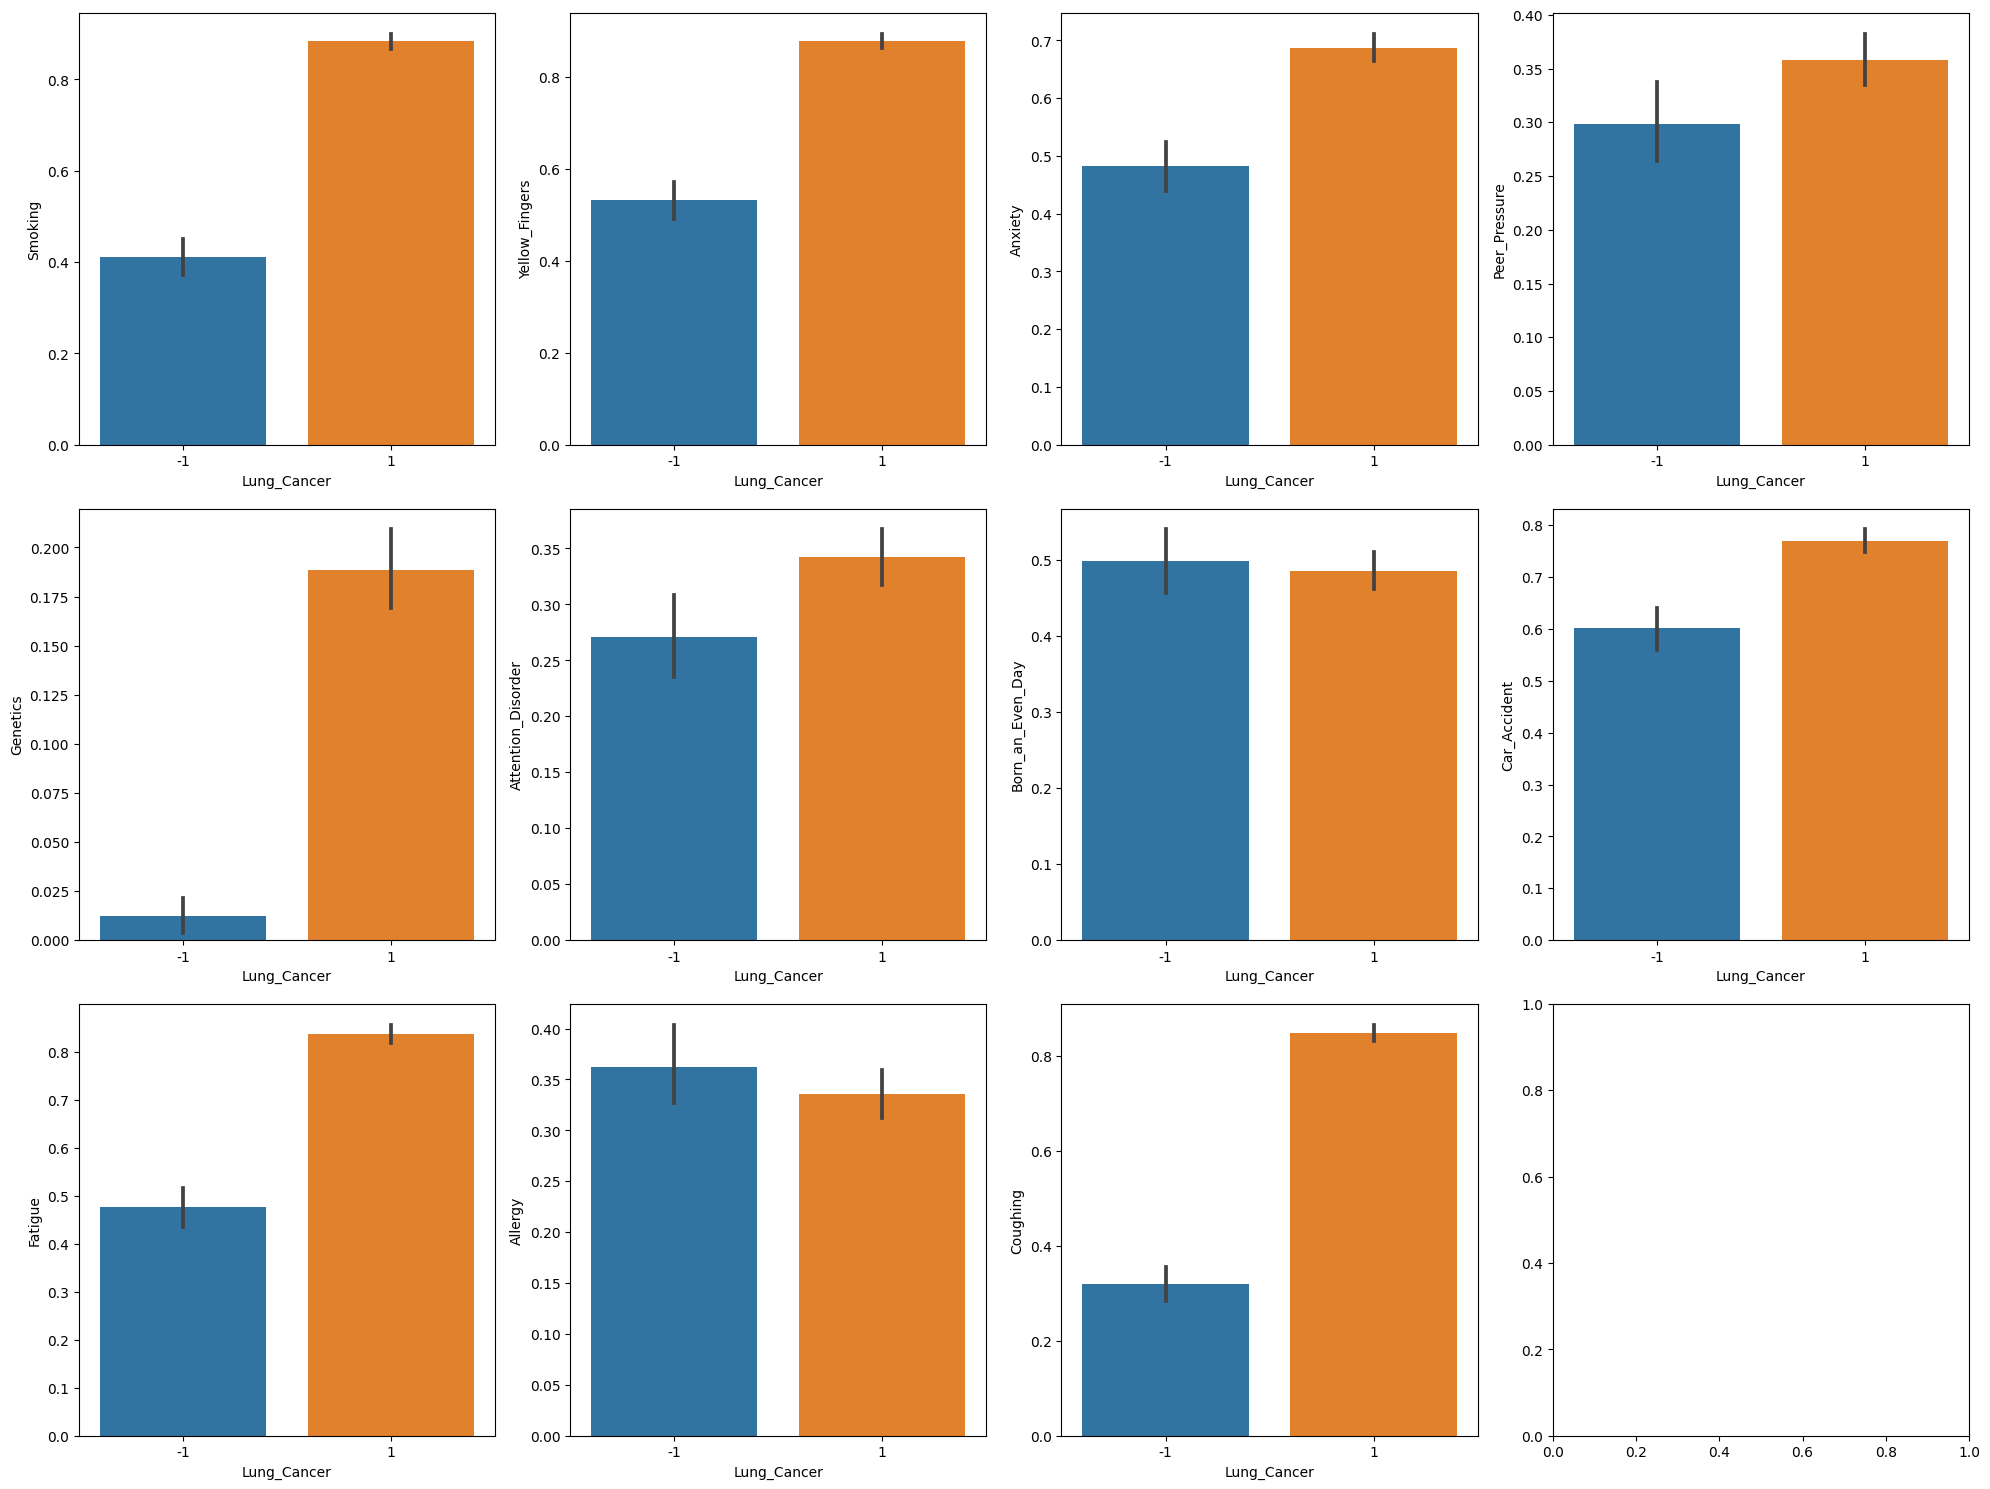

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data paths are correct and the dataset files are in the correct format
train_path = 'Data/lucas0_text/lucas0_train.data'
targets_path = 'Data/lucas0_text/lucas0_train.targets'

column_names_targets = ['Lung_Cancer']  
column_names = [
    'Smoking',
    'Yellow_Fingers',
    'Anxiety',
    'Peer_Pressure',
    'Genetics',
    'Attention_Disorder',
    'Born_an_Even_Day',
    'Car_Accident',
    'Fatigue',
    'Allergy',
    'Coughing'
]

# Load the data
train = pd.read_csv(train_path, names=column_names, delimiter='\s+')
targets = pd.read_csv(targets_path, names=column_names_targets)

# Combine the features with the target for a complete training dataset
train['Lung_Cancer'] = targets

# Data Inspection
print(train.head())
print(train.info())
print(train.describe())

# Check for missing values
print(train.isnull().sum())

# Univariate Analysis
train.hist(bins=20, figsize=(20, 15))
plt.show()

# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(), annot=True, fmt=".2f")
plt.show()

# Pairplot for Bivariate Analysis
sns.pairplot(train, hue='Lung_Cancer')
plt.show()

# Target Analysis
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
for idx, feature in enumerate(train.columns[:-1]):
    sns.barplot(x='Lung_Cancer', y=feature, data=train, ax=axes[idx // 4, idx % 4])
plt.tight_layout()
plt.show()

# Here you could add more analysis like Feature Importance or any other insights you might discover.


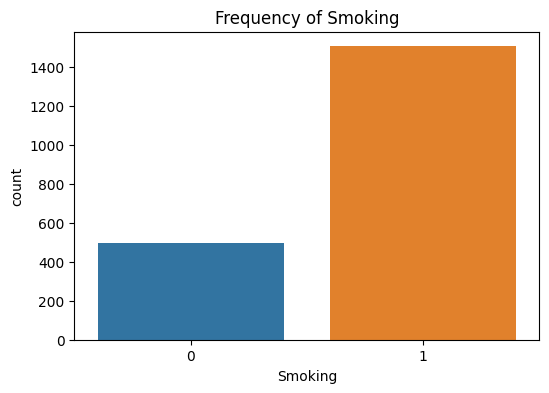

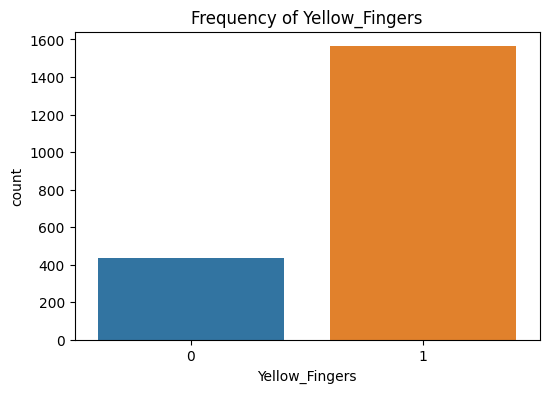

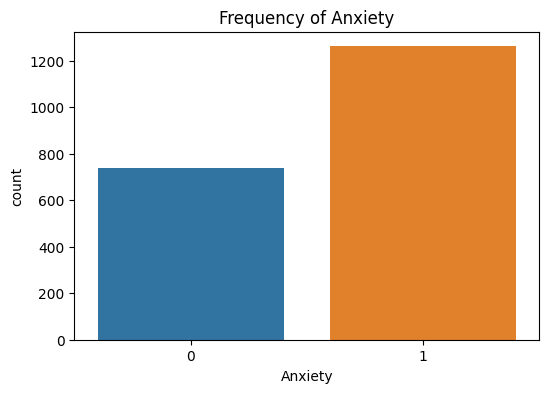

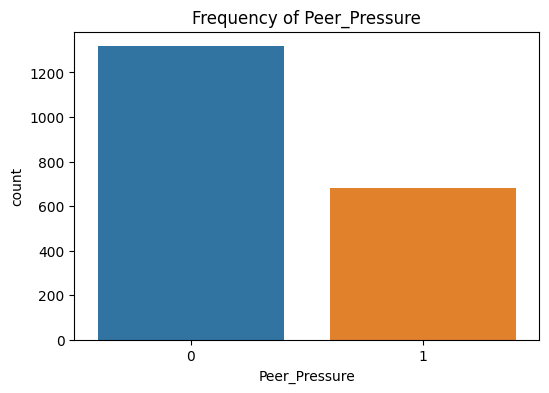

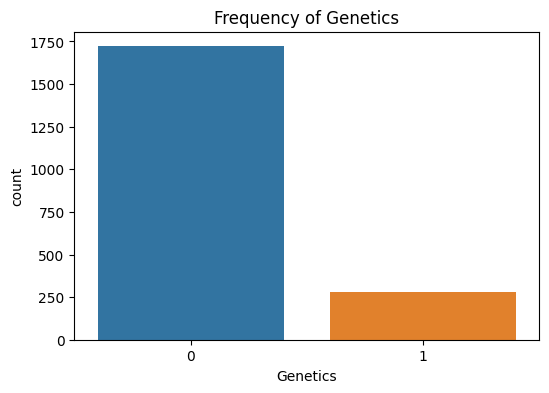

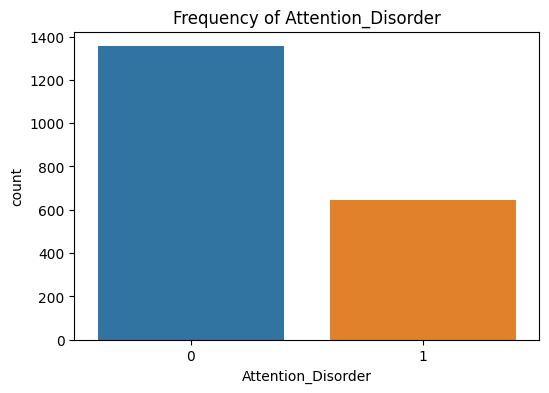

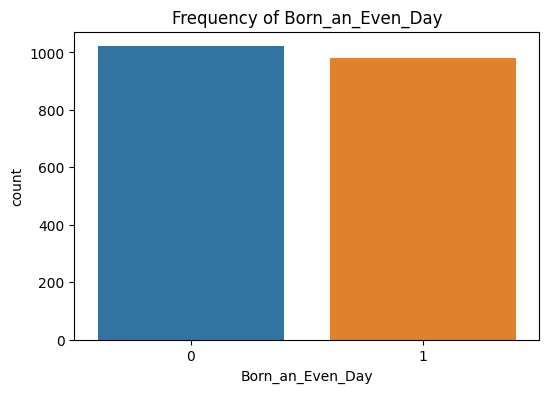

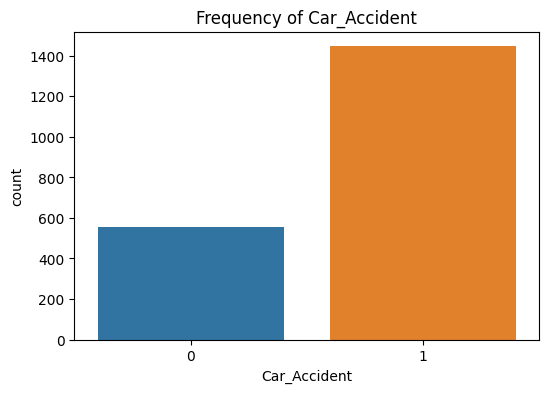

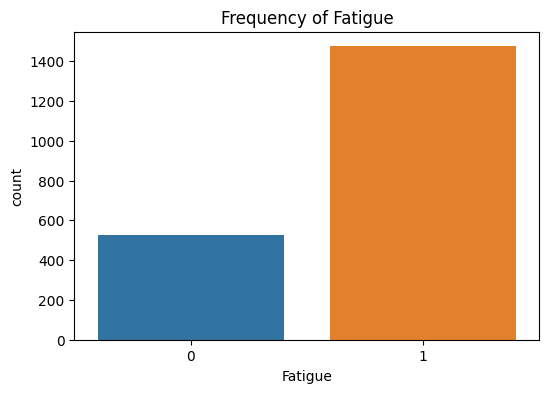

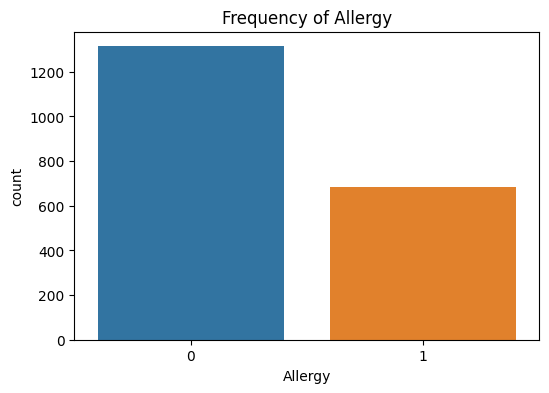

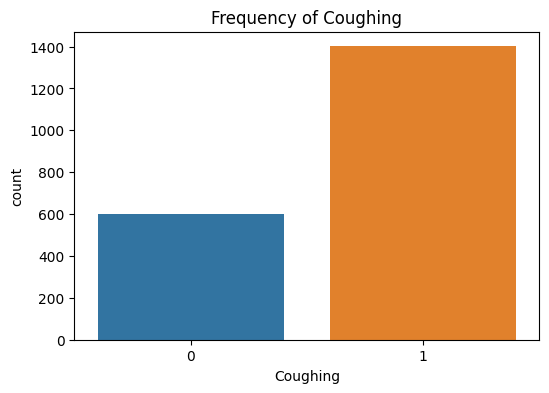

Feature ranking:
1. feature Coughing (0.28549389845499745)
2. feature Smoking (0.171036725386862)
3. feature Fatigue (0.0958352065305349)
4. feature Yellow_Fingers (0.08529947393388743)
5. feature Allergy (0.07492371671590904)
6. feature Genetics (0.07038614961931923)
7. feature Born_an_Even_Day (0.049670511312522515)
8. feature Anxiety (0.04607149625537983)
9. feature Peer_Pressure (0.04208615790787035)
10. feature Car_Accident (0.04097774956292346)
11. feature Attention_Disorder (0.03821891431979388)


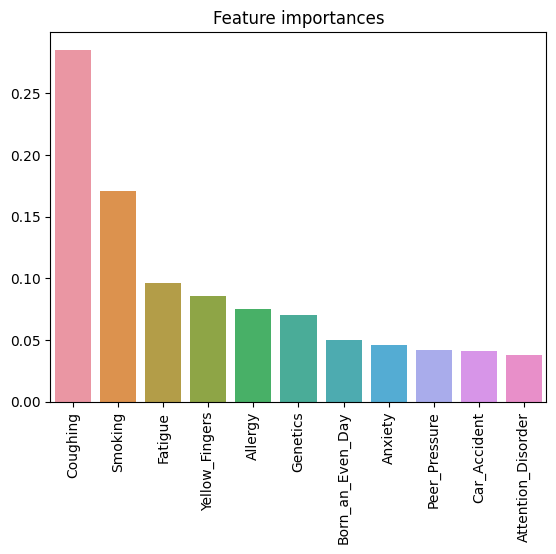

The accuracy of the model on the test set is: 85.50%


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Given column names and target column
column_names = [
    'Smoking', 'Yellow_Fingers', 'Anxiety', 'Peer_Pressure', 'Genetics',
    'Attention_Disorder', 'Born_an_Even_Day', 'Car_Accident', 'Fatigue',
    'Allergy', 'Coughing', 'Lung_Cancer'
]

# Load the data
train = pd.read_csv(train_path, names=column_names, delimiter='\s+')
targets = pd.read_csv(targets_path, names=['Lung_Cancer'], delimiter='\s+')
train['Lung_Cancer'] = targets['Lung_Cancer']

# Frequency Charts
for column in train.columns[:-1]: # Exclude the target variable for this chart
    plt.figure(figsize=(6,4))
    sns.countplot(x=column, data=train)
    plt.title(f'Frequency of {column}')
    plt.show()

# Feature Importance using Random Forest
X = train.drop('Lung_Cancer', axis=1)
y = train['Lung_Cancer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {column_names[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
sns.barplot(x=[column_names[i] for i in indices], y=importances[indices])
plt.xticks(rotation=90)
plt.show()

# Predict on the test set
y_pred = forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of the model on the test set is: {accuracy * 100:.2f}%")

# Insights
# At this point, you can analyze the feature importances given by the model. High importance indicates
# that a feature has more influence on the model's prediction. In real-world scenarios, this could inform
# further data collection, feature engineering, or even influence policy decisions if this were a medical dataset.


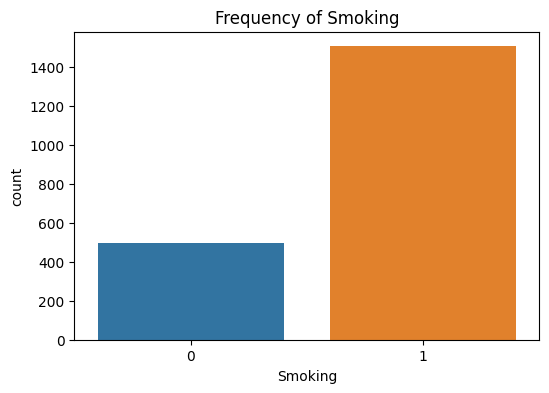

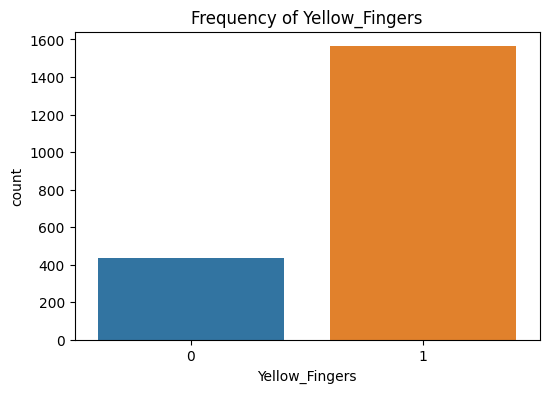

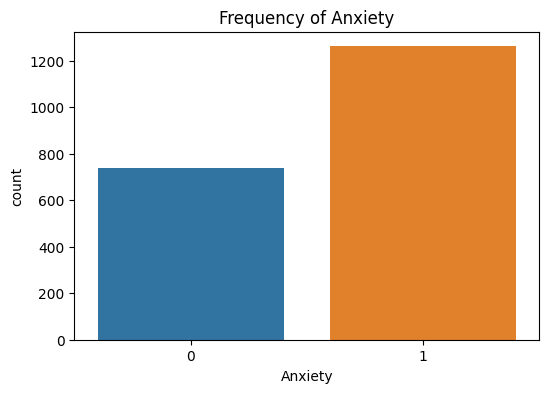

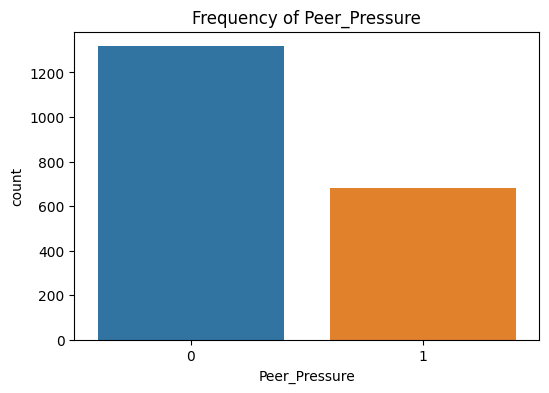

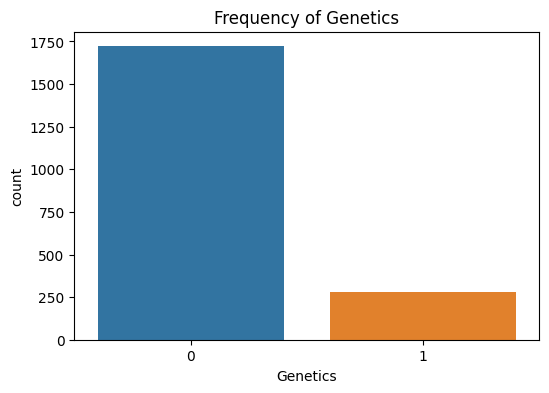

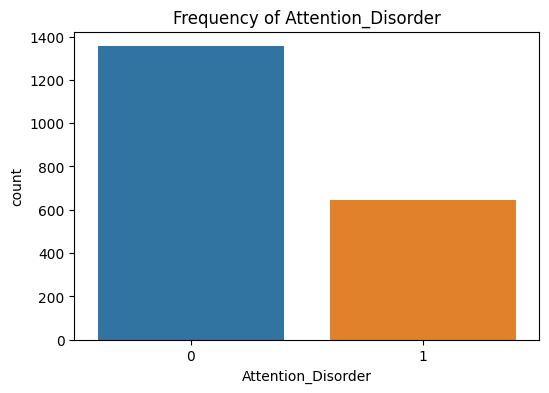

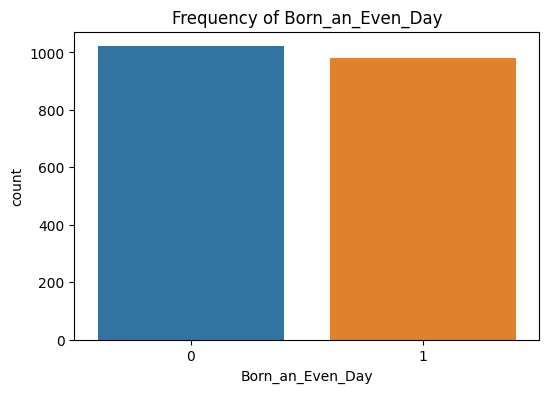

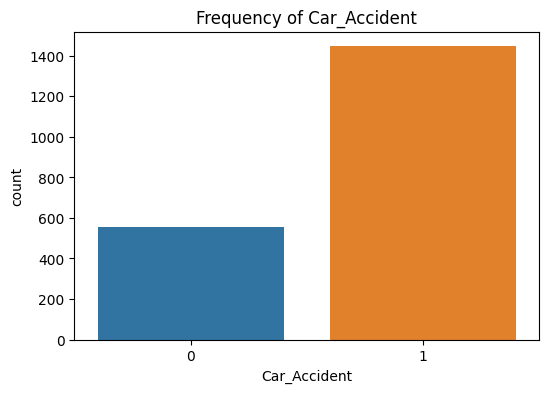

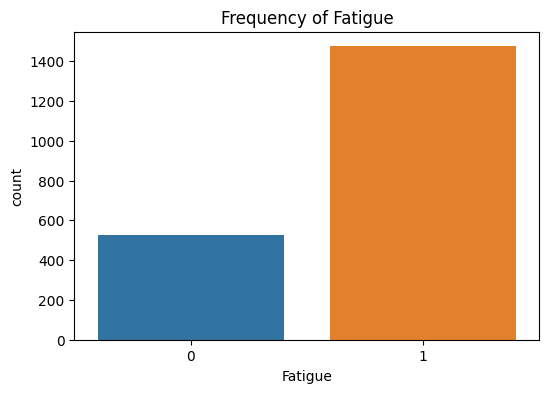

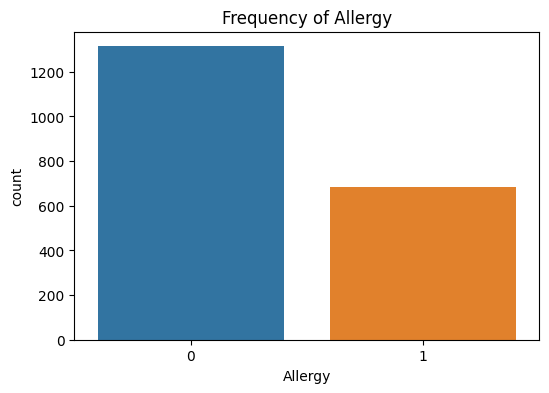

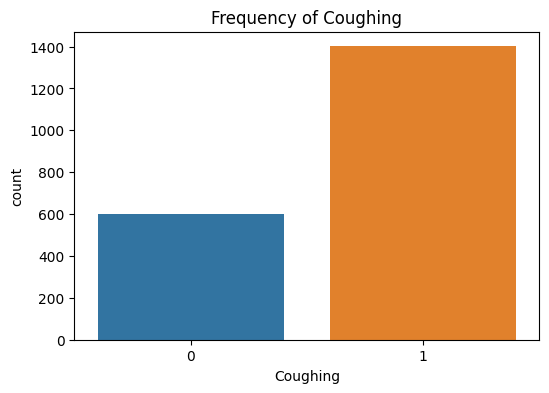

Feature ranking:
1. feature Coughing (0.28549389845499745)
2. feature Smoking (0.171036725386862)
3. feature Fatigue (0.0958352065305349)
4. feature Yellow_Fingers (0.08529947393388743)
5. feature Allergy (0.07492371671590904)
6. feature Genetics (0.07038614961931923)
7. feature Born_an_Even_Day (0.049670511312522515)
8. feature Anxiety (0.04607149625537983)
9. feature Peer_Pressure (0.04208615790787035)
10. feature Car_Accident (0.04097774956292346)
11. feature Attention_Disorder (0.03821891431979388)


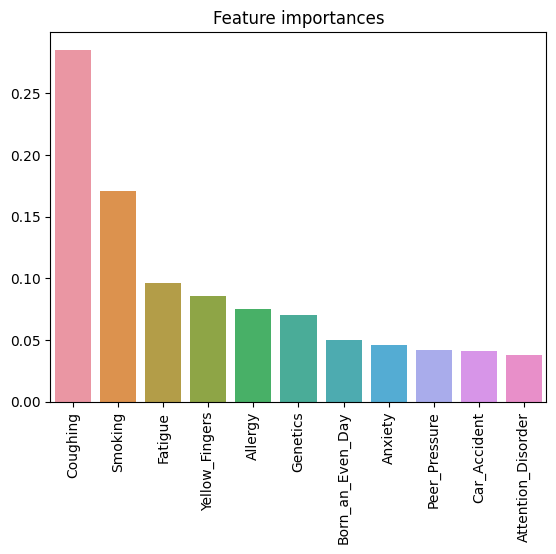

The accuracy of the model on the test set is: 85.50%


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Given column names and target column
column_names = [
    'Smoking', 'Yellow_Fingers', 'Anxiety', 'Peer_Pressure', 'Genetics',
    'Attention_Disorder', 'Born_an_Even_Day', 'Car_Accident', 'Fatigue',
    'Allergy', 'Coughing', 'Lung_Cancer'
]

# Load the data
train = pd.read_csv(train_path, names=column_names, delimiter='\s+')
targets = pd.read_csv(targets_path, names=['Lung_Cancer'], delimiter='\s+')
train['Lung_Cancer'] = targets['Lung_Cancer']

# Frequency Charts
for column in train.columns[:-1]: # Exclude the target variable for this chart
    plt.figure(figsize=(6,4))
    sns.countplot(x=column, data=train)
    plt.title(f'Frequency of {column}')
    plt.show()

# Feature Importance using Random Forest
X = train.drop('Lung_Cancer', axis=1)
y = train['Lung_Cancer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {column_names[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
sns.barplot(x=[column_names[i] for i in indices], y=importances[indices])
plt.xticks(rotation=90)
plt.show()

# Predict on the test set
y_pred = forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of the model on the test set is: {accuracy * 100:.2f}%")

# Insights
# At this point, you can analyze the feature importances given by the model. High importance indicates
# that a feature has more influence on the model's prediction. In real-world scenarios, this could inform
# further data collection, feature engineering, or even influence policy decisions if this were a medical dataset.
